# Retrieval evidences

## Notebook setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import glob as glob
import matplotlib as mpl
import matplotlib.patheffects as PathEffects
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import numpy as np
import pandas as pd
import seaborn as sns

import bz2
import corner
import json
import pathlib
import pickle
import utils
import warnings

from astropy import constants as const
from astropy import units as uni
from astropy.io import ascii, fits
from astropy.time import Time
from mpl_toolkits.axes_grid1 import ImageGrid

# Default figure dimensions
FIG_WIDE = (11, 5)
FIG_LARGE = (8, 11)

# Figure style
sns.set(style="ticks", palette="colorblind", color_codes=True, context="talk")
params = utils.plot_params()
plt.rcParams.update(params)

## [Dowload data](https://www.dropbox.com/sh/102kasznvvv8dyy/AACMwQ7etBuXlOXQOTWpXWlca?dl=1)

Unzip this into a folder named `data` in the same level as this notebook

## Load

In [37]:
rel_to_spot = False

base_dir_fixed_R0 = "data/retrieval_evidence/spot_lower_fixed_R0"
(
    df_Delta_lnZ_fixed,
    df_Delta_lnZ_err_fixed,
    species_min_fixed,
    model_min_fixed,
    data_dict_fixed,
) = utils.get_evidences(base_dir_fixed_R0, relative_to_spot_only=rel_to_spot)

base_dir_fit_R0 = "data/retrieval_evidence/spot_lower_fit_R0"
(
    df_Delta_lnZ_fit,
    df_Delta_lnZ_err_fit,
    species_min_fit,
    model_min_fit,
    data_dict_fit,
) = utils.get_evidences(base_dir_fit_R0, relative_to_spot_only=rel_to_spot)

print("Fixed R0")
print(f"Minimul log-evidence: ({species_min_fixed}, {model_min_fixed})")
display(df_Delta_lnZ_fixed)

print("\nFit R0")
print(f"Minimul log-evidence: ({species_min_fit}, {model_min_fit})")
display(df_Delta_lnZ_fit)

Fixed R0
Minimul log-evidence: (CO, clear)


,Na,K,TiO,Na_K,Na_TiO,K_TiO,Na_K_TiO,CO
clear,11.649510,7.421502,13.891933,11.383097,13.386900,13.328053,13.042404,0.000000
clear+cloud,11.052625,8.907434,12.819984,10.600959,12.592446,12.417707,12.291581,8.984482
clear+haze,11.106434,9.644679,12.783866,10.643013,12.546369,12.366451,12.142141,9.843571
clear+cloud+haze,10.270051,9.159279,11.901289,9.803599,11.669683,11.574552,11.278454,9.262430
clear+spot,11.663481,11.233919,11.663316,11.107211,11.419221,11.173254,10.927502,11.637142
clear+spot+cloud,10.595937,10.289352,10.713469,10.116558,10.455154,10.222637,9.959613,10.530365
clear+spot+haze,10.456183,10.239475,10.542247,10.035995,10.249952,10.076720,9.849467,10.462852
clear+spot+cloud+haze,9.581367,9.359660,9.629849,9.082406,9.332296,9.220389,8.950631,9.515328



Fit R0
Minimul log-evidence: (K, clear+spot+cloud)


,Na,K,TiO,Na_K,Na_TiO,K_TiO,Na_K_TiO,CO
clear,2.540187,0.807536,4.636170,2.453314,4.717220,4.569445,4.227604,0.842274
clear+cloud,2.156500,0.728322,4.013794,1.529097,3.802738,3.610931,3.519387,0.830459
clear+haze,2.299625,1.878195,3.867348,1.792175,3.723402,3.702487,3.249522,1.848735
clear+cloud+haze,1.651863,1.373049,3.299506,1.265989,2.969531,2.887848,2.801454,1.384514
clear+spot,1.986855,0.227077,4.224842,1.598080,4.058254,3.906182,3.609893,0.411719
clear+spot+cloud,1.344115,0.000000,3.385048,0.939643,3.150525,3.149587,2.869141,0.031311
clear+spot+haze,1.525325,1.085760,3.312821,1.228557,3.072417,2.925748,2.601322,1.098970
clear+spot+cloud+haze,0.812119,0.648131,2.378183,0.471873,2.203181,2.177578,1.657147,0.749255


## Plot

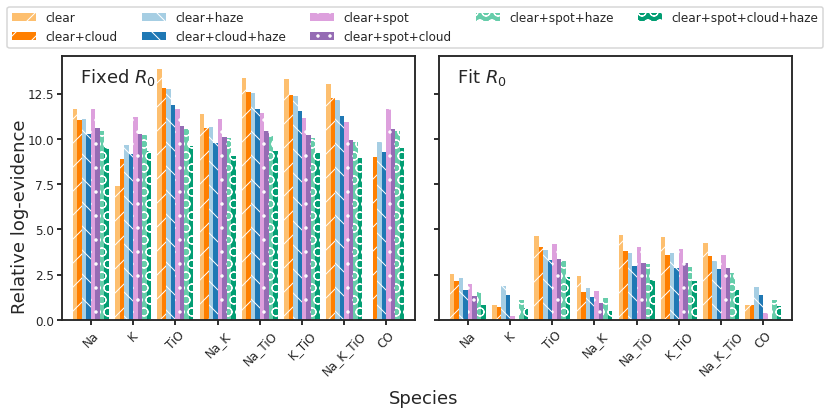

In [38]:
fig, axes = plt.subplots(1, 2, figsize=FIG_WIDE, sharey=True)
ax_left, ax_right = axes

# Left: Fixed R_0
p_fixed = utils.plot_evidence_summary(ax_left, df_Delta_lnZ_fixed)
p_fixed.annotate("Fixed $R_0$", xy=(0.05, 0.9), xycoords="axes fraction")

# Right: Fit R_0
p_fit = utils.plot_evidence_summary(ax_right, df_Delta_lnZ_fit)
p_fit.annotate("Fit $R_0$", xy=(0.05, 0.9), xycoords="axes fraction")


# From https://stackoverflow.com/a/55826518
bars = p_fixed.patches
# Possible hatch patterns: ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
patterns = [
    '/',
    '\\',
    '.',
    'O',
]  # set hatch patterns in the correct order
hatches = []  # list for hatches in the order of the bars
for h in patterns:  # loop over patterns to create bar-ordered hatches
    for i in range(int(len(bars) / len(patterns))):
        hatches.append(h)
for bar, hatch in zip(bars, hatches):  # loop over bars and hatches to set hatches in correct order
    bar.set_hatch(hatch)
    
bars = p_fit.patches
# Possible hatch patterns: ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
patterns = [
    '/',
    '\\',
    '.',
    'O',
]  # set hatch patterns in the correct order
hatches = []  # list for hatches in the order of the bars
for h in patterns:  # loop over patterns to create bar-ordered hatches
    for i in range(int(len(bars) / len(patterns))):
        hatches.append(h)
for bar, hatch in zip(bars, hatches):  # loop over bars and hatches to set hatches in correct order
    bar.set_hatch(hatch)

# Combined legend
handles, labels = ax_left.get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    loc="upper center",
    ncol=5,
    fontsize="12",
    bbox_to_anchor=(0.5, 1.1),
)

# Save
fig.text(0.51, -0.02, "Species", ha="center")
fig.text(-0.01, 0.5, "Relative log-evidence", va="center", rotation="vertical")
fig.tight_layout()
fig.set_size_inches(FIG_WIDE)

out_base_name = "evidence_summary"
if rel_to_spot:
    out_base_name += "_spot_only"
    
utils.savefig(f"../paper/figures/retrieval_evidence/{out_base_name}.pdf")